In [19]:
import pandas as pd
from utilities import clean_data, missing
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
sns.set_style("whitegrid")  # Base style

In [2]:
df, df_brands, df_allbrands, brands, compsets, compset_groups, groups_bycompset = clean_data()

In [3]:
df_missing = missing(df)

In [4]:
brands_by_cgroup = {} # dict: list of brands contained in each compset_group
for group in compset_groups:
    brands_by_cgroup[group] = df_brands[df_brands['compset_group'] == group][
        'business_entity_doing_business_as_name'].tolist()

In [5]:
df_brands

,business_entity_doing_business_as_name,compset_group,compset,legal_entity_name,domicile_country_name,ultimate_parent_legal_entity_name,primary_exchange_name
0,24S,Apparel Retail,"[Apparel Retail, Ecommerce Apparel Retail, Eco...",LVMH Moet Hennessy Louis Vuitton SE,France,LVMH Moet Hennessy Louis Vuitton SE,Euronext Paris
1,3.1 Phillip Lim,Luxury & Premium & Mainstream,"[Luxury & Premium & Mainstream, Soft Luxury, U...",Alexander Wang Inc,None,Alexander Wang Inc,None
2,3CE,Beauty & Boutique,[Beauty & Boutique],L'Oreal,France,L'Oreal,Euronext Paris
3,A. Lange & Soehne,Luxury & Premium & Mainstream,"[Hard Luxury, Luxury & Premium & Mainstream]",Richemont,Switzerland,Richemont,Six Swiss Exchange
4,ANIMALE,Apparel Retail,[Apparel Retail],GRUPO DE MODA SOMA SA,Brazil,GRUPO DE MODA SOMA SA,Bolsa de Valores de Sao Paulo (XBSP)
...,...,...,...,...,...,...,...
700,bareMinerals,Beauty & Boutique,[Beauty & Boutique],Shiseido,Japan,Shiseido,Tokyo Stock Exchange
701,dd's Discounts,Apparel Retail,"[Apparel Retail, US Discount Store, US Softlin...",Ross Stores,United States of America,Ross Stores,NASDAQ Global Select
702,e.l.f.,Beauty & Boutique,[Beauty & Boutique],elf Beauty Inc,United States of America,elf Beauty Inc,New York Stock Exchange
703,iRobot,Home Appliances,[Home Appliances],iRobot Corp,United States of America,iRobot Corp,NASDAQ - All Markets


In [6]:
df

,period_end_date,business_entity_doing_business_as_name,followers,pictures,videos,comments,likes
0,2017-05-06,24S,NaN,NaN,NaN,NaN,NaN
1,2017-05-13,24S,NaN,6.0,3.0,57.0,1765.0
2,2017-05-20,24S,NaN,6.0,3.0,57.0,1765.0
3,2017-05-27,24S,NaN,6.0,3.0,57.0,1765.0
4,2017-06-03,24S,NaN,24.0,3.0,109.0,3922.0
...,...,...,...,...,...,...,...
298035,2023-08-19,shopDisney,4221812.0,266.0,52.0,3099.0,266166.0
298036,2023-08-26,shopDisney,4224473.0,265.0,61.0,3494.0,316126.0
298037,2023-09-02,shopDisney,4228605.0,268.0,61.0,3920.0,341795.0
298038,2023-09-09,shopDisney,4233764.0,259.0,56.0,3700.0,335231.0


In [23]:
brands_by_cgroup

{'Luxury & Premium & Mainstream': ['3.1 Phillip Lim',
  'A. Lange & Soehne',
  'Acne Studios',
  'Alexander McQueen',
  'Alexander Wang',
  'Alice & Olivia',
  'AllSaints',
  'Allbirds',
  'Armani',
  'Audemars Piguet',
  'Balenciaga',
  'Balmain',
  'Bell & Ross',
  'Blancpain',
  'Boss',
  'Bottega Veneta',
  'Breguet',
  'Breitling',
  'Brooks Brothers',
  'Brunello Cucinelli',
  'Bulgari',
  'Burberry',
  'Calvin Klein',
  'Canada Goose',
  'Carolina Herrera',
  'Cartier',
  'Casio Watch',
  'Celine',
  'Certina',
  'Chanel',
  'Chaumet',
  'Chloe',
  'Chopard',
  'Christian Louboutin',
  'Citizen',
  'Claudie Pierlot',
  'Coach',
  'Cole Haan',
  'DKNY',
  'Daniel Wellington',
  'Diane Von Furstenberg',
  'Dior',
  'Dockers',
  'Dolce & Gabbana',
  'Donna Karan',
  'Dr. Martens',
  'Dsquared2',
  'Eddie Bauer',
  'Fendi',
  'Ferragamo',
  'Givenchy',
  'Glashutte Original',
  'Gucci',
  'Hamilton Watch',
  'Harry Winston',
  'Hermes',
  'Hublot',
  'Hugo',
  'IWC Schaffhausen',
  

In [7]:
cgroup_ranking = {cgroup: df[df['business_entity_doing_business_as_name'].isin(brands_by_cgroup[cgroup])] for cgroup in compset_groups}

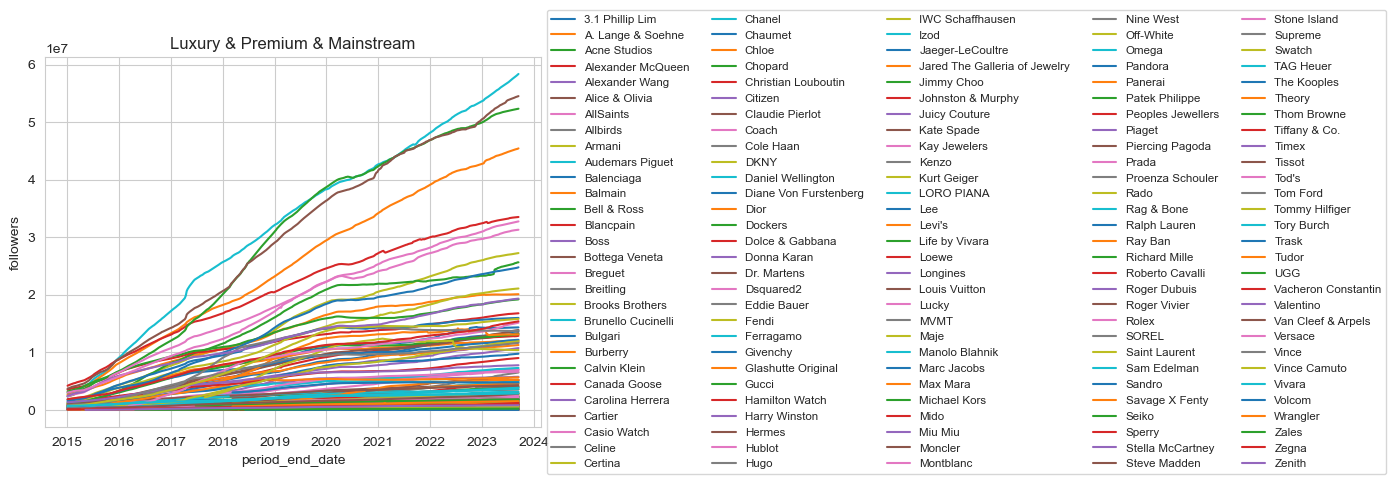

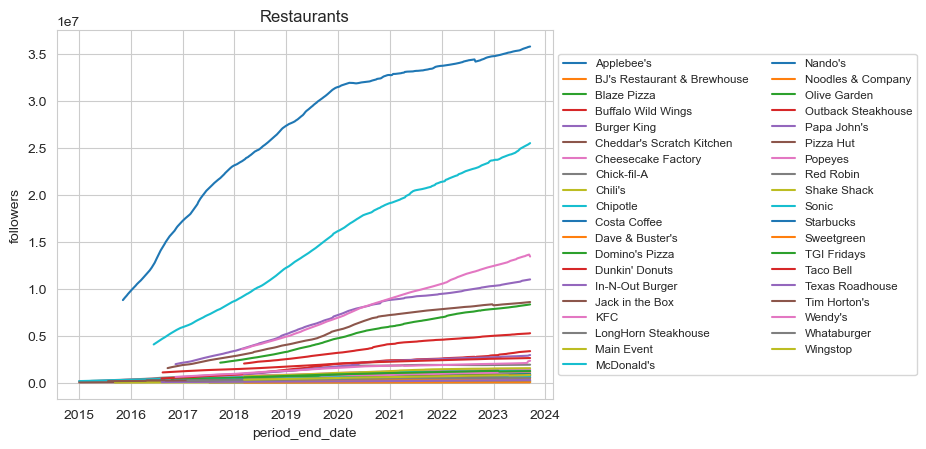

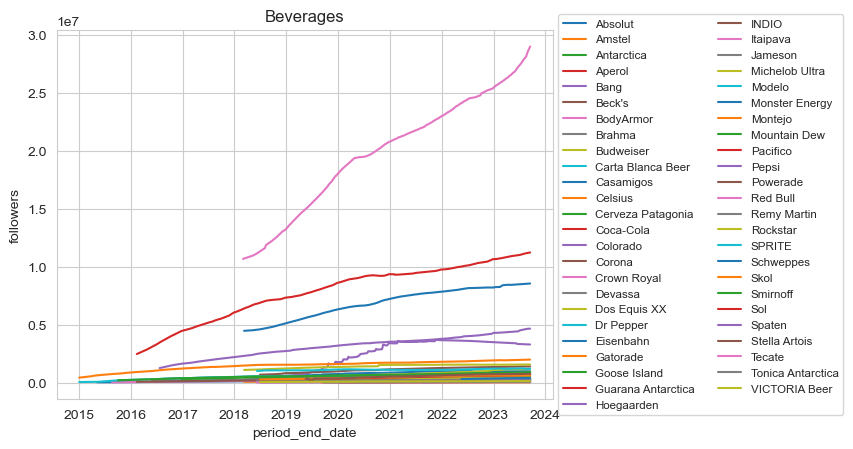

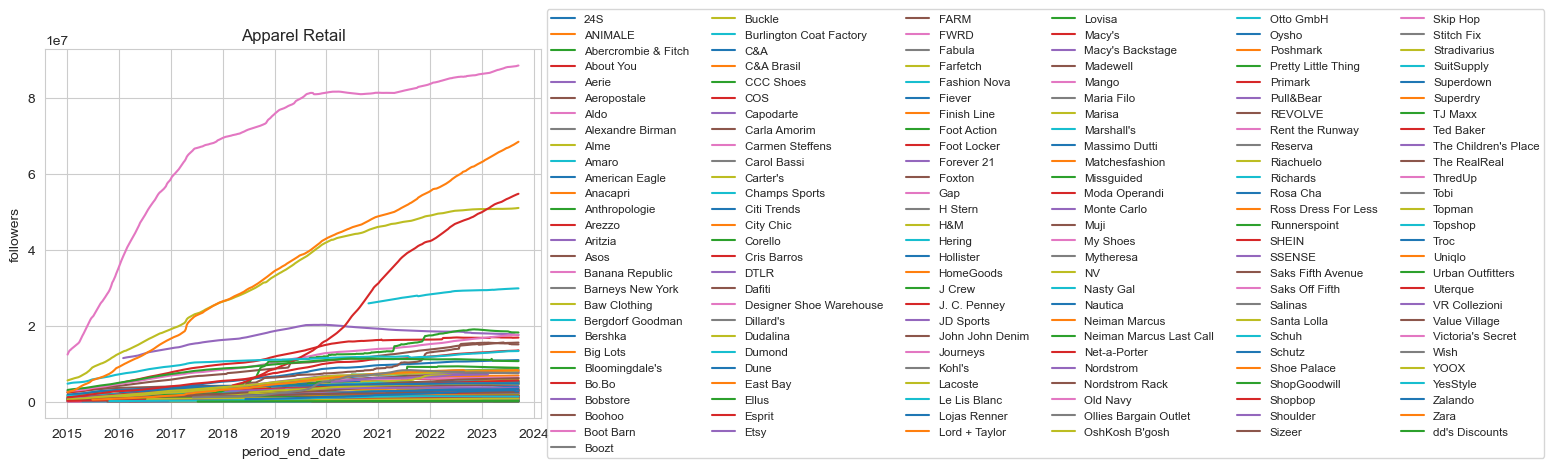

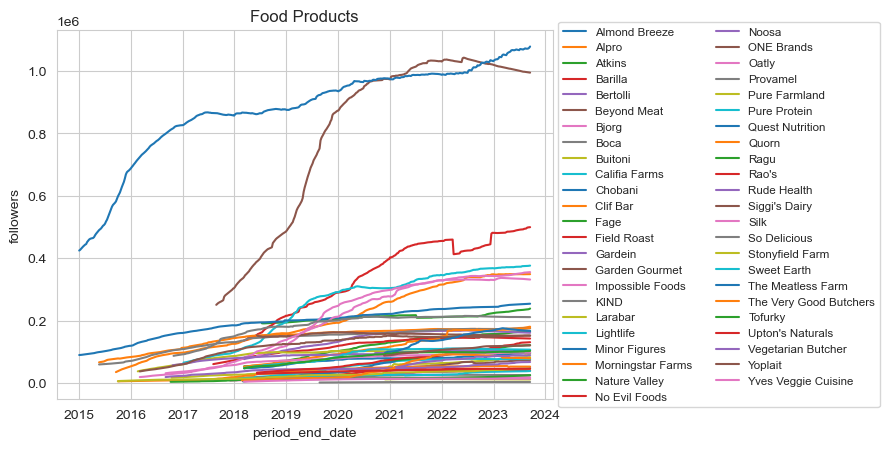

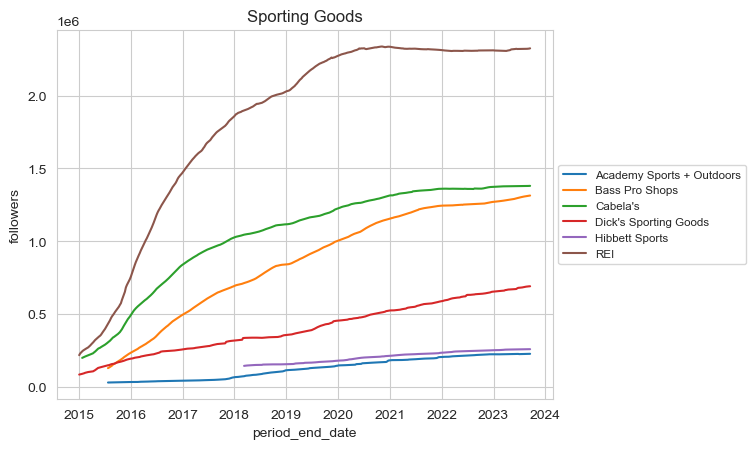

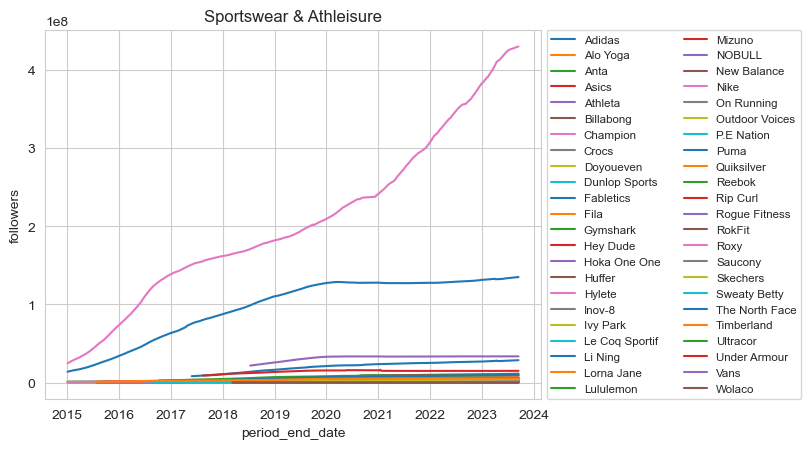

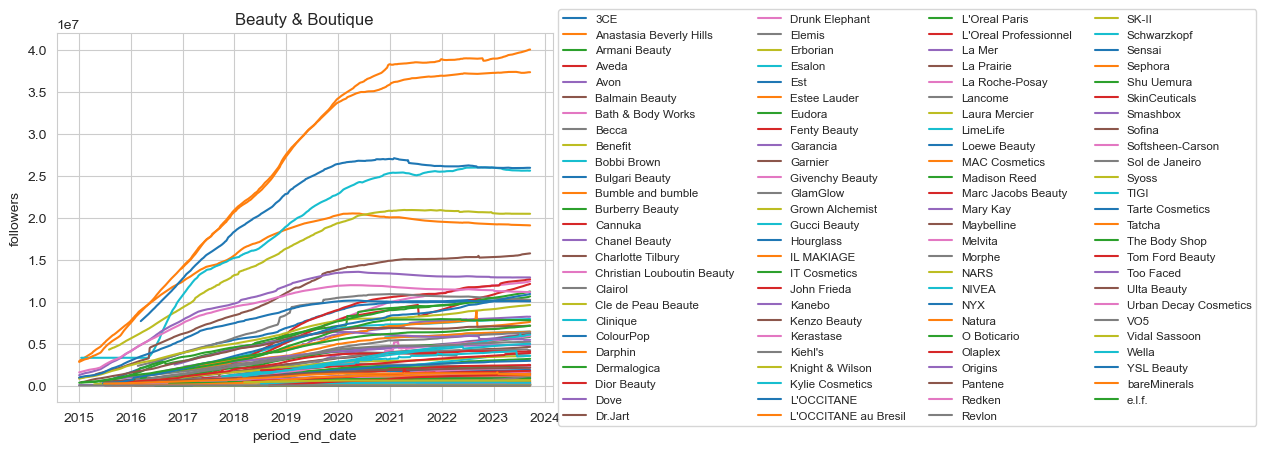

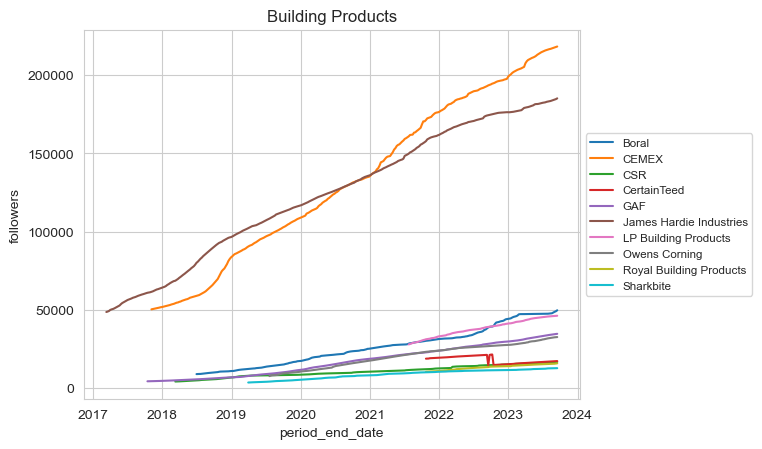

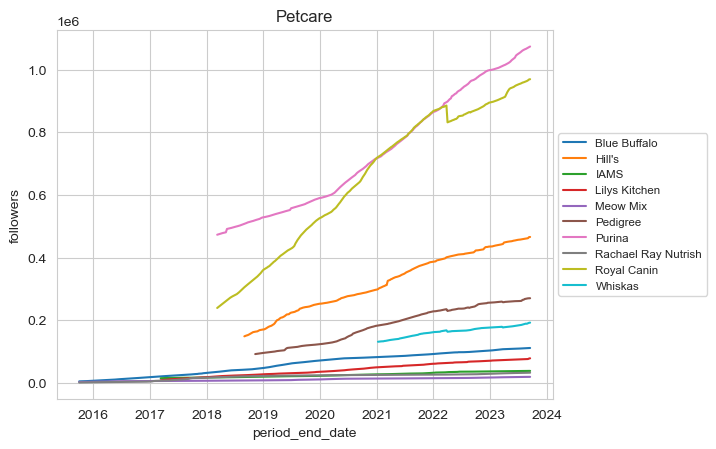

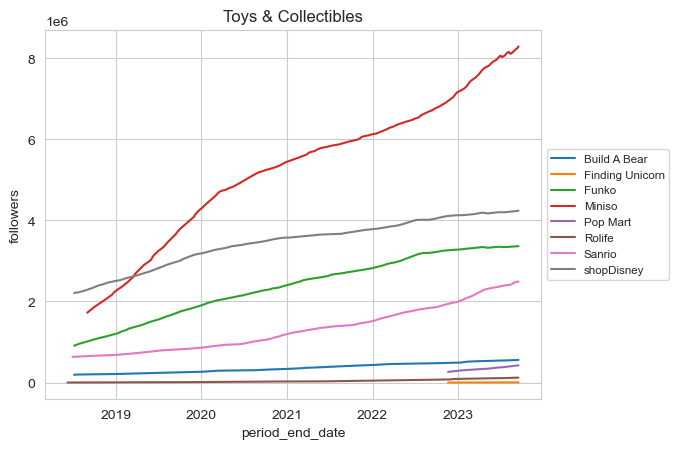

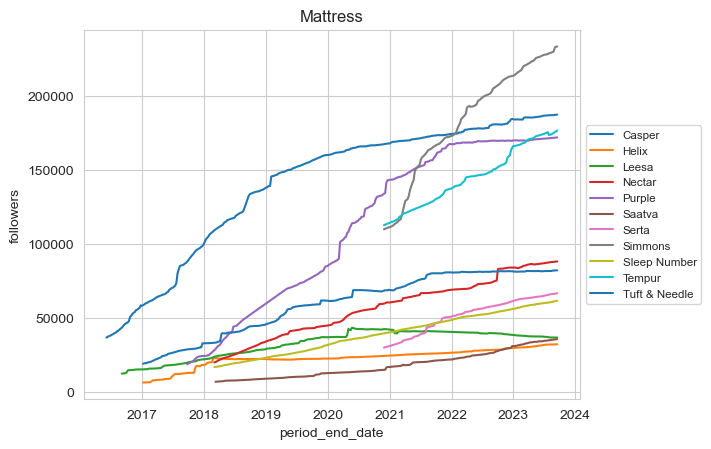

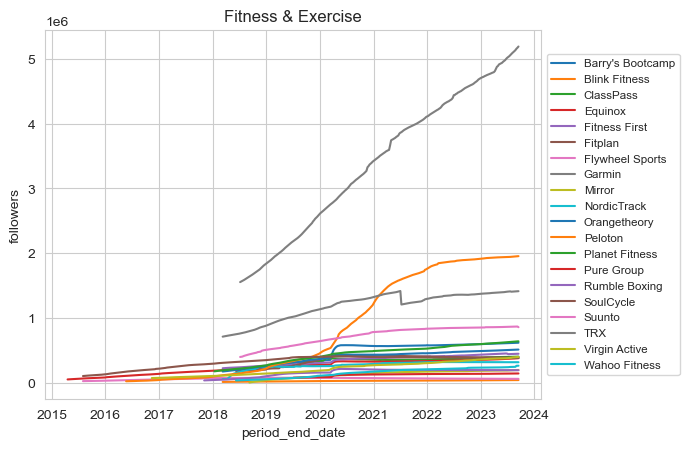

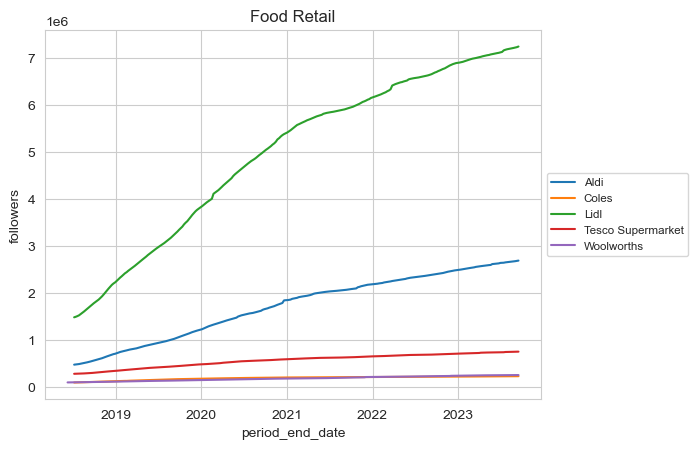

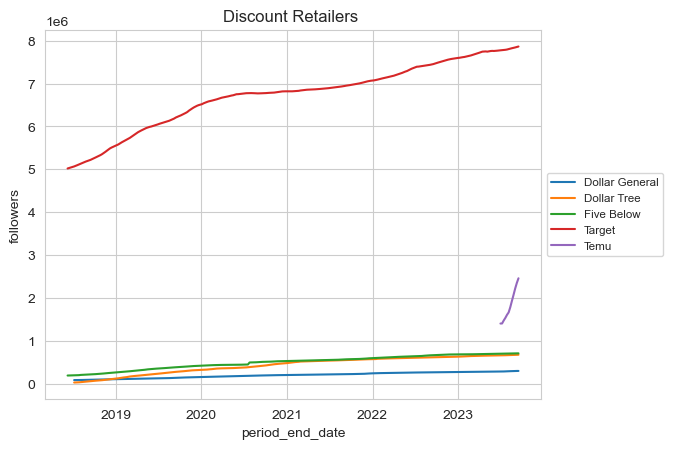

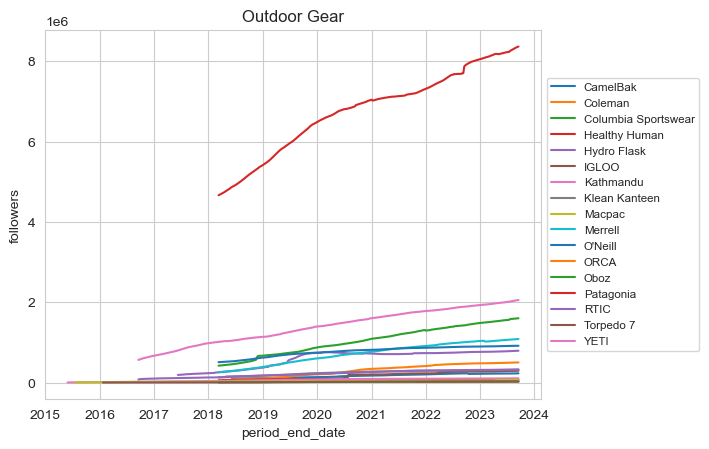

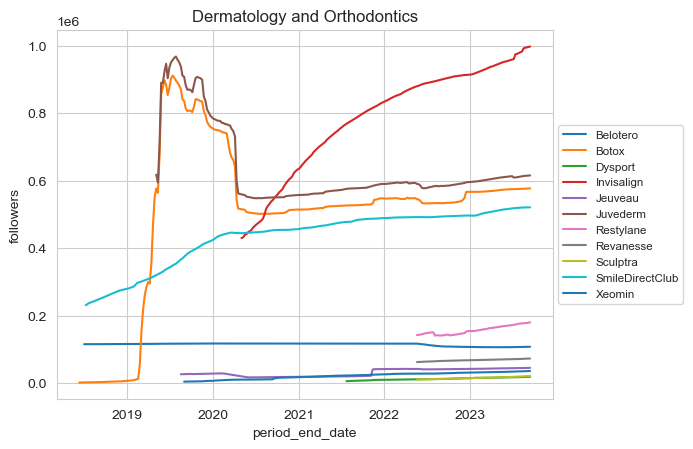

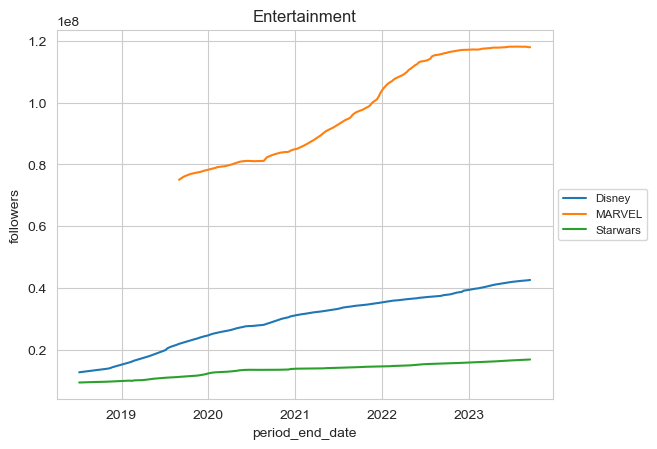

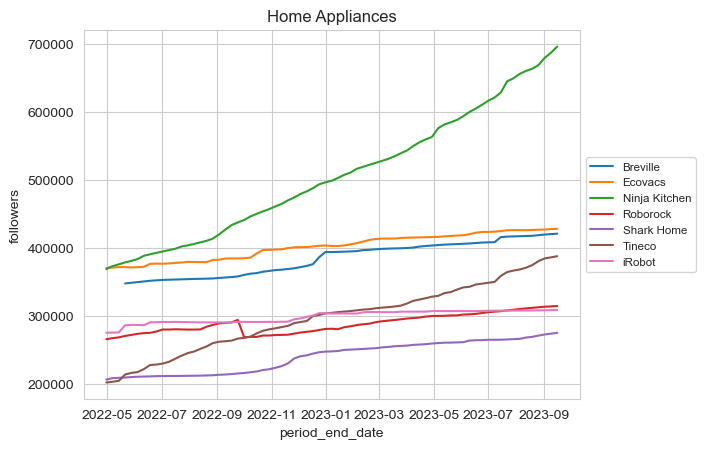

In [22]:
for cgroup in compset_groups:
    plt.figure()
    for brand, data in cgroup_ranking[cgroup].groupby('business_entity_doing_business_as_name'):
        plt.plot(data['period_end_date'], data['followers'], label=brand)
    plt.xlabel('period_end_date')
    plt.ylabel('followers')
    plt.title(cgroup)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small', ncol=math.ceil(len(brands_by_cgroup[cgroup])/30))
    plt.grid(True)
    plt.show()